In [ ]:
# A. 카이제곱 검정(적합성)
# B. Shapiro-Wilk Test(정규성)
# C. Kolmogorov-Smirnov Test
# D. Q-Q Plot

In [1]:
## A.카이제곱 검정(독합성)
# 적합성 검정은 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지 검정하는 방법.
# 귀무가설 : 각 범주의 비유을 x이다.
# 대립가설 : 각 범주의 비유을 x라고 할 수 없다.

In [2]:
import pandas as pd
df = pd.read_csv('C:/adp/data/titanic.csv')
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
886,0,2,male,27.0,0,0,13.00,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.00,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.45,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.00,C,First,True,Cherbourg
890,0,3,male,32.0,0,0,7.75,Q,Third,True,Queenstown


In [13]:
from scipy.stats import chisquare
table = df[df['survived'] == 1]['sex'].value_counts()
chisquare(table, f_exp = [171, 171]) # 범주의 비율이 동일하다.
# pvalue=2.0144e-11 이므로 유의수준 0.05 하에서 귀무가설을 기각한다. 따라서 각 범주의 비율이 동일(50%, 50%)하다고 할 수 없다.

Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)

In [22]:
## B.Shapiro-Wilk Test(정규성)
import pingouin as pg
pg.normality(df['age'])
# pval 7.322166e-08로 유의수준 0.05하에서 정규분포를 따르지 않는다.

,W,pval,normal
age,0.981455,7.322166e-08,False


In [32]:
## C.Kolmogorov-Smirnov Test / https://data-newbie.tistory.com/87 
# 통계량에 따른 등급(일반적 사용)
# 0.2 이하	판별력 낮은 모형    / 0.2 ~ 0.4	적정한 모형
# 0.4 ~ 0.5	판별록이 좋은 모형  / 0.5 이상	판별력이 아주 좋은 모형
df = pd.read_csv("https://raw.githubusercontent.com/deepanshu88/data/master/data.csv")
df.tail()

,p,y
995,0.002950,0
996,0.014218,0
997,0.076319,0
998,0.006082,0
999,0.255054,0


In [33]:
# KS Two Sample Test
from scipy.stats import ks_2samp
ks_2samp(df.loc[df.y==0,"p"], df.loc[df.y==1,"p"])
pvalue=2.22e-16 으로 유의수준 0.05하에서 서로 다른 분포라고 할 수 있다.

KstestResult(statistic=0.6033333333333334, pvalue=2.220446049250313e-16)

<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

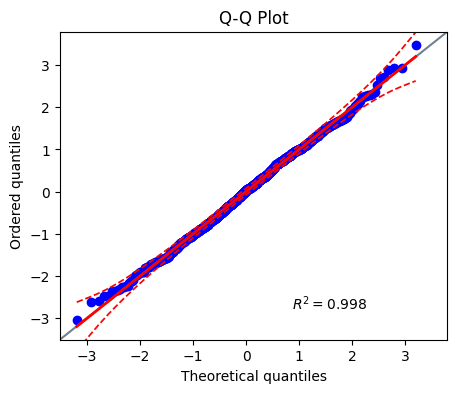

In [37]:
## D. Q-Q Plot
from scipy.stats import norm
norm_rv = norm(loc=10, scale=1) ## 평균이 0이고 표준편차가 1인 정규 분포
x = norm_rv.rvs(size=1000)
pg.qqplot(x, dist='norm')

In [54]:
# 크론바흐 알파 계수(Cronbach's Alpha)란??
# 신뢰도를 검사하는 방법. 주로 동일한 목표를 측정하기 위한 여러 개의 설문 항목에 대해 실시합니다.
# * 신뢰도 검사 : 측정하고자 하는 것을 얼마나 일관적이게 측정하고 있는지 검사하는 것
# ㅁ 가정
# 1. 각 항목은 동일한 주제를 측정하는 것이다.
# 2. 각 항목의 중요도는 모두 동일하다.
# ㅁ 신뢰도
#  - 측정척도의 신뢰도란 측정척도가 측정하려고 의도하는것을 얼마나 정확하게 오차 없이 측정하고 있는지를 나타냄
#  - 동일한 개념(또는 개상)을 유사한 척도로 측정할 경우 일관된 결과를 산출하는 정도
#   . 신뢰도가 높다는 것은 동일한 개념을 측정하기 위해 고안된 서로 다른 측정도구가 같은 결과를 산출한다는 것을 의미
#   . 또는 동일한 측정도구를 이용하는 시간 간격을 두고 측정하였을 때 두 결과의 일치도가 높다는 의미
# ㅁ 신뢰도 지표
# ㅁ 크론바흐 알파계수
#  - 하나의 개념을 여러 측정항목으로 측정할 때 나타나는 항목 간의 일관성이나 동질성의 정도를 나타내며 이를 내적일관성이라고 함
#  - 0에서 1 사이의 값을 가지며 클수록 측정항목의 신뢰도가 높음
#  - 0.8 이상 : 바람직, 0.6~0.8 : 수용할만, 0.6 이하 : 신뢰도 결어

In [55]:
import pandas as pd
df = pd.read_csv('C:/adp/data/cronbachs_alpha.csv')
df.tail()

,a1,a2,a3,a4,a5,b1,b2,b3,b4,b5
35,7,6,6,7,5,6,5,6,5,5
36,6,6,7,7,7,7,7,4,5,7
37,7,7,7,7,7,7,7,7,5,7
38,4,5,5,6,7,7,5,5,4,6
39,5,5,5,5,4,6,7,7,7,7


In [56]:
import pingouin as pg
pg.cronbach_alpha(data=df[['a1', 'a2', 'a3', 'a4', 'a5']])
# 0.777로 0.6 이상이므로 신뢰도가 있다고 볼 수 있다.

(0.777338382653574, array([0.646, 0.87 ]))

In [57]:
import pingouin as pg
pg.cronbach_alpha(data=df[['b1', 'b2', 'b3', 'b4', 'b5']])
# 0.694로 0.6 이상이므로 신뢰도가 있다고 볼 수 있다.

(0.6941793893129772, array([0.514, 0.822]))